In [1]:
# @title Unzip tệp test
!unzip '/content/drive/MyDrive/public_test.zip'

Archive:  /content/drive/MyDrive/public_test.zip
   creating: public_test/
  inflating: __MACOSX/._public_test  
  inflating: public_test/49074608.jpg  
  inflating: __MACOSX/public_test/._49074608.jpg  
  inflating: public_test/63701630.jpg  
  inflating: __MACOSX/public_test/._63701630.jpg  
  inflating: public_test/50869636.jpg  
  inflating: __MACOSX/public_test/._50869636.jpg  
  inflating: public_test/81768353.jpg  
  inflating: __MACOSX/public_test/._81768353.jpg  
  inflating: public_test/66790091.jpg  
  inflating: __MACOSX/public_test/._66790091.jpg  
  inflating: public_test/41766113.jpg  
  inflating: __MACOSX/public_test/._41766113.jpg  
  inflating: public_test/50009958.jpg  
  inflating: __MACOSX/public_test/._50009958.jpg  
  inflating: public_test/image_839.jpg  
  inflating: __MACOSX/public_test/._image_839.jpg  
  inflating: public_test/76578894.jpg  
  inflating: __MACOSX/public_test/._76578894.jpg  
  inflating: public_test/image_10251.jpg  
  inflating: __MACOSX/p

In [2]:
from IPython.display import display, Image
import os
import json

# Đường dẫn tới thư mục chứa hình ảnh
image_folder_path = '/content/public_test'

# Đường dẫn tới file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo một từ điển để theo dõi số lần xuất hiện của mỗi image_id
image_id_counts = {}

# Tạo danh sách để lưu trữ các image_id bị trùng
duplicate_image_ids = []

# Lặp qua các file trong thư mục
for image_name, image_id in json_data.items():
    # Kiểm tra xem image_id đã xuất hiện trong từ điển chưa
    if image_id in image_id_counts:
        image_id_counts[image_id] += 1
        # Nếu image_id đã xuất hiện trước đó, thêm vào danh sách image_id bị trùng
        if image_id not in duplicate_image_ids:
            duplicate_image_ids.append(image_id)
    else:
        image_id_counts[image_id] = 1

# In ra các image_id bị trùng
print("Các image_id bị trùng:")
for duplicate_id in duplicate_image_ids:
    print(duplicate_id)


Các image_id bị trùng:


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
!pip install -U torchvision # We need a new versino of torchvision for this project

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [5]:
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math
from PIL import Image
import cv2
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# remove arnings (optional)
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict, deque
import datetime
import time
from tqdm import tqdm # progress bar
from torchvision.utils import draw_bounding_boxes

In [7]:
print(torch.__version__)
print(torchvision.__version__)

2.1.2+cu121
0.16.2+cu121


In [8]:
# our dataset is in cocoformat, we will need pypcoco tools
!pip install pycocotools
from pycocotools.coco import COCO

In [9]:
# Now, we will define our transforms
from albumentations.pytorch import ToTensorV2

In [10]:
def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform

In [11]:
class AquariumDetection(datasets.VisionDataset):
    def __init__(self, root, split='train', transform=None, target_transform=None, transforms=None):
        # the 3 transform parameters are reuqired for datasets.VisionDataset
        super().__init__(root, transforms, transform, target_transform)
        self.split = split #train, valid, test
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json")) # annotatiosn stored here
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.ids = [id for id in self.ids if (len(self._load_target(id)) > 0)]

    def _load_image(self, id: int):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index):
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)
        target = copy.deepcopy(self._load_target(id))

        boxes = [t['bbox'] + [t['category_id']] for t in target] # required annotation format for albumentations
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)

        image = transformed['image']
        boxes = transformed['bboxes']

        new_boxes = [] # convert from xywh to xyxy
        for box in boxes:
            xmin = box[0]
            xmax = xmin + box[2]
            ymin = box[1]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.tensor(new_boxes, dtype=torch.float32)

        targ = {} # here is our transformed target
        targ['boxes'] = boxes
        targ['labels'] = torch.tensor([t['category_id'] for t in target], dtype=torch.int64)
        targ['image_id'] = torch.tensor([t['image_id'] for t in target])
        targ['area'] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # we have a different area
        targ['iscrowd'] = torch.tensor([t['iscrowd'] for t in target], dtype=torch.int64)
        return image.div(255), targ # scale images
    def __len__(self):
        return len(self.ids)

In [12]:
!unzip '/content/drive/MyDrive/AI.zip'

Archive:  /content/drive/MyDrive/AI.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/00000003_jpg.rf.d4235359b9a2b7cb9910d8eaf4b55e72.jpg  
 extracting: train/00000003_jpg.rf.dcd3c36f224565a7c03d102ed2a9b72a.jpg  
 extracting: train/00000004_jpg.rf.26146f046870e2ceac84e52b44bb165f.jpg  
 extracting: train/00000004_jpg.rf.a41eed1bc61737078eb0ae0610319bc0.jpg  
 extracting: train/00000005_jpg.rf.0f901da82cd868220aa6e189d6921415.jpg  
 extracting: train/00000005_jpg.rf.4fbbb720393d2dbbaf1b78d586750215.jpg  
 extracting: train/00000006_jpg.rf.120855ec43dd4e423076907628494dc7.jpg  
 extracting: train/00000006_jpg.rf.e4bce6c9b51f475db6bfd7c65b1a1d51.jpg  
 extracting: train/00000008_jpg.rf.afab5a46d831c39d5d47c0999305ed0c.jpg  
 extracting: train/00000008_jpg.rf.b2e325c09fd381dae6941cb566cab30d.jpg  
 extracting: train/00000011_jpg.rf.5a5d32b4451a6da7d6d4c5e3fc5fb2ee.jpg  
 extracting: train/00000011_jpg.rf.c5766195fe71bc4

In [13]:
dataset_path = '/content'

In [14]:
#load classes
coco = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
categories = coco.cats
n_classes = len(categories.keys())
categories

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


{0: {'id': 0, 'name': 'face-eLi7', 'supercategory': 'none'},
 1: {'id': 1, 'name': 'Caucasian', 'supercategory': 'face-eLi7'},
 2: {'id': 2, 'name': 'Mongoloid', 'supercategory': 'face-eLi7'},
 3: {'id': 3, 'name': 'Negroid', 'supercategory': 'face-eLi7'}}

In [15]:
classes = [i[1]['name'] for i in categories.items()]
classes

['face-eLi7', 'Caucasian', 'Mongoloid', 'Negroid']

In [16]:
train_dataset = AquariumDetection(root=dataset_path, transforms=get_transforms(True))

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


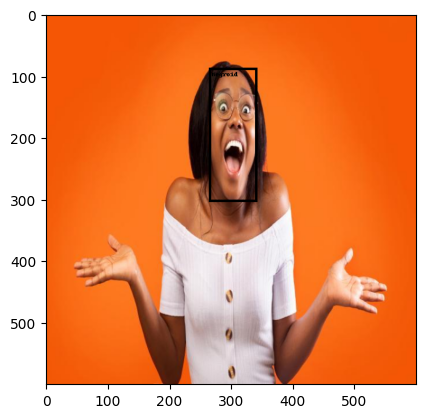

In [17]:
# Lets view a sample
sample = train_dataset[2]
img_int = torch.tensor(sample[0] * 255, dtype=torch.uint8)
plt.imshow(draw_bounding_boxes(
    img_int, sample[1]['boxes'], [classes[i] for i in sample[1]['labels']], width=4
).permute(1, 2, 0))

In [18]:
len(train_dataset)

4666

In [19]:
# lets load the faster rcnn model
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, n_classes)

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 89.4MB/s]


In [20]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [21]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)

In [22]:
images,targets = next(iter(train_loader))
images = list(image for image in images)
targets = [{k:v for k, v in t.items()} for t in targets]
output = model(images, targets) # just make sure this runs without error

In [23]:
device = torch.device("cuda") # use GPU to train

In [24]:
model = model.to(device)

In [25]:
# Now, and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[16, 22], gamma=0.1) # lr scheduler

In [26]:
import sys

In [27]:
def train_one_epoch(model, optimizer, loader, device, epoch):
    model.to(device)
    model.train()

#     lr_scheduler = None
#     if epoch == 0:
#         warmup_factor = 1.0 / 1000 # do lr warmup
#         warmup_iters = min(1000, len(loader) - 1)

#         lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor = warmup_factor, total_iters=warmup_iters)

    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(loader):
        images = list(image.to(device) for image in images)
        targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # the model computes the loss automatically if we pass in targets
        losses = sum(loss for loss in loss_dict.values())
        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        loss_value = losses.item()

        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping trainig") # train if loss becomes infinity
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

#         if lr_scheduler is not None:
#             lr_scheduler.step() #

    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, lr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}, loss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))

In [ ]:
num_epochs=50

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
#     lr_scheduler.step()

100%|██████████| 1167/1167 [02:54<00:00,  6.68it/s]


Epoch 0, lr: 0.010000, loss: 0.876359, loss_classifier: 0.446488, loss_box: 0.418010, loss_rpn_box: 0.004058, loss_object: 0.007803


100%|██████████| 1167/1167 [02:49<00:00,  6.88it/s]


Epoch 1, lr: 0.010000, loss: 0.844415, loss_classifier: 0.407059, loss_box: 0.429142, loss_rpn_box: 0.003287, loss_object: 0.004928


100%|██████████| 1167/1167 [02:40<00:00,  7.28it/s]


Epoch 2, lr: 0.010000, loss: 0.830152, loss_classifier: 0.383223, loss_box: 0.439494, loss_rpn_box: 0.003109, loss_object: 0.004326


100%|██████████| 1167/1167 [02:37<00:00,  7.42it/s]


Epoch 3, lr: 0.010000, loss: 0.769628, loss_classifier: 0.340491, loss_box: 0.422227, loss_rpn_box: 0.002869, loss_object: 0.004041


100%|██████████| 1167/1167 [02:34<00:00,  7.55it/s]


Epoch 4, lr: 0.010000, loss: 0.748913, loss_classifier: 0.321370, loss_box: 0.420973, loss_rpn_box: 0.002853, loss_object: 0.003717


100%|██████████| 1167/1167 [02:35<00:00,  7.50it/s]


Epoch 5, lr: 0.010000, loss: 0.739423, loss_classifier: 0.302001, loss_box: 0.431107, loss_rpn_box: 0.002709, loss_object: 0.003606


100%|██████████| 1167/1167 [02:34<00:00,  7.56it/s]


Epoch 6, lr: 0.010000, loss: 0.736926, loss_classifier: 0.301137, loss_box: 0.429606, loss_rpn_box: 0.002695, loss_object: 0.003488


100%|██████████| 1167/1167 [02:34<00:00,  7.56it/s]


Epoch 7, lr: 0.010000, loss: 0.673515, loss_classifier: 0.263990, loss_box: 0.403793, loss_rpn_box: 0.002545, loss_object: 0.003186


100%|██████████| 1167/1167 [02:34<00:00,  7.54it/s]


Epoch 8, lr: 0.010000, loss: 0.669373, loss_classifier: 0.256902, loss_box: 0.406969, loss_rpn_box: 0.002452, loss_object: 0.003051


100%|██████████| 1167/1167 [02:33<00:00,  7.60it/s]


Epoch 9, lr: 0.010000, loss: 0.672415, loss_classifier: 0.253421, loss_box: 0.413615, loss_rpn_box: 0.002466, loss_object: 0.002913


100%|██████████| 1167/1167 [02:35<00:00,  7.52it/s]


Epoch 10, lr: 0.010000, loss: 0.659450, loss_classifier: 0.243766, loss_box: 0.410368, loss_rpn_box: 0.002374, loss_object: 0.002943


100%|██████████| 1167/1167 [02:33<00:00,  7.58it/s]


Epoch 11, lr: 0.010000, loss: 0.625752, loss_classifier: 0.230014, loss_box: 0.390641, loss_rpn_box: 0.002338, loss_object: 0.002759


100%|██████████| 1167/1167 [02:32<00:00,  7.63it/s]


Epoch 12, lr: 0.010000, loss: 0.611154, loss_classifier: 0.217233, loss_box: 0.388627, loss_rpn_box: 0.002221, loss_object: 0.003074


100%|██████████| 1167/1167 [02:33<00:00,  7.63it/s]


Epoch 13, lr: 0.010000, loss: 0.605476, loss_classifier: 0.217211, loss_box: 0.383500, loss_rpn_box: 0.002207, loss_object: 0.002558


100%|██████████| 1167/1167 [02:32<00:00,  7.63it/s]


Epoch 14, lr: 0.010000, loss: 0.573657, loss_classifier: 0.193411, loss_box: 0.375974, loss_rpn_box: 0.002072, loss_object: 0.002199


100%|██████████| 1167/1167 [02:31<00:00,  7.70it/s]


Epoch 15, lr: 0.010000, loss: 0.577327, loss_classifier: 0.197408, loss_box: 0.375485, loss_rpn_box: 0.002086, loss_object: 0.002349


100%|██████████| 1167/1167 [02:31<00:00,  7.68it/s]


Epoch 16, lr: 0.010000, loss: 0.600454, loss_classifier: 0.217267, loss_box: 0.378477, loss_rpn_box: 0.002193, loss_object: 0.002517


100%|██████████| 1167/1167 [02:31<00:00,  7.72it/s]


Epoch 17, lr: 0.010000, loss: 0.584089, loss_classifier: 0.196237, loss_box: 0.383554, loss_rpn_box: 0.002081, loss_object: 0.002217


100%|██████████| 1167/1167 [02:31<00:00,  7.68it/s]


Epoch 18, lr: 0.010000, loss: 0.560908, loss_classifier: 0.191710, loss_box: 0.364919, loss_rpn_box: 0.002020, loss_object: 0.002259


100%|██████████| 1167/1167 [02:31<00:00,  7.73it/s]


Epoch 19, lr: 0.010000, loss: 0.551816, loss_classifier: 0.182013, loss_box: 0.365715, loss_rpn_box: 0.001941, loss_object: 0.002147


100%|██████████| 1167/1167 [02:30<00:00,  7.73it/s]


Epoch 20, lr: 0.010000, loss: 0.519490, loss_classifier: 0.171649, loss_box: 0.343866, loss_rpn_box: 0.001930, loss_object: 0.002045


100%|██████████| 1167/1167 [02:32<00:00,  7.66it/s]


Epoch 21, lr: 0.010000, loss: 0.513621, loss_classifier: 0.167333, loss_box: 0.342455, loss_rpn_box: 0.001868, loss_object: 0.001965


100%|██████████| 1167/1167 [02:32<00:00,  7.67it/s]


Epoch 22, lr: 0.010000, loss: 0.502271, loss_classifier: 0.166666, loss_box: 0.332031, loss_rpn_box: 0.001757, loss_object: 0.001817


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 23, lr: 0.010000, loss: 0.498404, loss_classifier: 0.163075, loss_box: 0.331614, loss_rpn_box: 0.001821, loss_object: 0.001894


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 24, lr: 0.010000, loss: 0.478663, loss_classifier: 0.150752, loss_box: 0.324508, loss_rpn_box: 0.001674, loss_object: 0.001729


100%|██████████| 1167/1167 [02:30<00:00,  7.74it/s]


Epoch 25, lr: 0.010000, loss: 0.496281, loss_classifier: 0.162536, loss_box: 0.330070, loss_rpn_box: 0.001758, loss_object: 0.001917


100%|██████████| 1167/1167 [02:31<00:00,  7.70it/s]


Epoch 26, lr: 0.010000, loss: 0.508618, loss_classifier: 0.172685, loss_box: 0.331956, loss_rpn_box: 0.001887, loss_object: 0.002091


100%|██████████| 1167/1167 [02:31<00:00,  7.72it/s]


Epoch 27, lr: 0.010000, loss: 0.477575, loss_classifier: 0.153930, loss_box: 0.320156, loss_rpn_box: 0.001730, loss_object: 0.001759


100%|██████████| 1167/1167 [02:31<00:00,  7.72it/s]


Epoch 28, lr: 0.010000, loss: 0.474132, loss_classifier: 0.152933, loss_box: 0.317794, loss_rpn_box: 0.001657, loss_object: 0.001748


100%|██████████| 1167/1167 [02:31<00:00,  7.71it/s]


Epoch 29, lr: 0.010000, loss: 0.463747, loss_classifier: 0.146517, loss_box: 0.313775, loss_rpn_box: 0.001689, loss_object: 0.001767


100%|██████████| 1167/1167 [02:30<00:00,  7.76it/s]


Epoch 30, lr: 0.010000, loss: 0.442288, loss_classifier: 0.135140, loss_box: 0.304109, loss_rpn_box: 0.001553, loss_object: 0.001486


100%|██████████| 1167/1167 [02:30<00:00,  7.73it/s]


Epoch 31, lr: 0.010000, loss: 0.444031, loss_classifier: 0.143207, loss_box: 0.297651, loss_rpn_box: 0.001601, loss_object: 0.001572


100%|██████████| 1167/1167 [02:30<00:00,  7.77it/s]


Epoch 32, lr: 0.010000, loss: 0.457266, loss_classifier: 0.145226, loss_box: 0.308851, loss_rpn_box: 0.001600, loss_object: 0.001589


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 33, lr: 0.010000, loss: 0.444236, loss_classifier: 0.137669, loss_box: 0.303451, loss_rpn_box: 0.001566, loss_object: 0.001549


100%|██████████| 1167/1167 [02:32<00:00,  7.65it/s]


Epoch 34, lr: 0.010000, loss: 0.405180, loss_classifier: 0.122525, loss_box: 0.279781, loss_rpn_box: 0.001496, loss_object: 0.001378


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 35, lr: 0.010000, loss: 0.407606, loss_classifier: 0.128672, loss_box: 0.276061, loss_rpn_box: 0.001453, loss_object: 0.001420


100%|██████████| 1167/1167 [02:31<00:00,  7.72it/s]


Epoch 36, lr: 0.010000, loss: 0.448756, loss_classifier: 0.149622, loss_box: 0.295872, loss_rpn_box: 0.001615, loss_object: 0.001647


100%|██████████| 1167/1167 [02:30<00:00,  7.76it/s]


Epoch 37, lr: 0.010000, loss: 0.436864, loss_classifier: 0.141227, loss_box: 0.292259, loss_rpn_box: 0.001619, loss_object: 0.001759


100%|██████████| 1167/1167 [02:30<00:00,  7.74it/s]


Epoch 38, lr: 0.010000, loss: 0.472606, loss_classifier: 0.161300, loss_box: 0.308021, loss_rpn_box: 0.001652, loss_object: 0.001633


100%|██████████| 1167/1167 [02:30<00:00,  7.77it/s]


Epoch 39, lr: 0.010000, loss: 0.439098, loss_classifier: 0.134767, loss_box: 0.301229, loss_rpn_box: 0.001573, loss_object: 0.001529


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 40, lr: 0.010000, loss: 0.426915, loss_classifier: 0.132458, loss_box: 0.291433, loss_rpn_box: 0.001516, loss_object: 0.001509


100%|██████████| 1167/1167 [02:30<00:00,  7.78it/s]


Epoch 41, lr: 0.010000, loss: 0.406484, loss_classifier: 0.121738, loss_box: 0.281991, loss_rpn_box: 0.001427, loss_object: 0.001328


100%|██████████| 1167/1167 [02:30<00:00,  7.77it/s]


Epoch 42, lr: 0.010000, loss: 0.398706, loss_classifier: 0.128711, loss_box: 0.266768, loss_rpn_box: 0.001506, loss_object: 0.001720


100%|██████████| 1167/1167 [02:29<00:00,  7.82it/s]


Epoch 43, lr: 0.010000, loss: 0.397676, loss_classifier: 0.122967, loss_box: 0.271775, loss_rpn_box: 0.001486, loss_object: 0.001448


100%|██████████| 1167/1167 [02:30<00:00,  7.76it/s]


Epoch 44, lr: 0.010000, loss: 0.370295, loss_classifier: 0.109063, loss_box: 0.258691, loss_rpn_box: 0.001339, loss_object: 0.001203


100%|██████████| 1167/1167 [02:29<00:00,  7.81it/s]


Epoch 45, lr: 0.010000, loss: 0.365162, loss_classifier: 0.116087, loss_box: 0.246319, loss_rpn_box: 0.001382, loss_object: 0.001373


100%|██████████| 1167/1167 [02:32<00:00,  7.66it/s]


Epoch 46, lr: 0.010000, loss: 0.367788, loss_classifier: 0.114646, loss_box: 0.250274, loss_rpn_box: 0.001398, loss_object: 0.001471


100%|██████████| 1167/1167 [02:30<00:00,  7.76it/s]


Epoch 47, lr: 0.010000, loss: 0.343826, loss_classifier: 0.102054, loss_box: 0.239297, loss_rpn_box: 0.001250, loss_object: 0.001225


100%|██████████| 1167/1167 [02:30<00:00,  7.75it/s]


Epoch 48, lr: 0.010000, loss: 0.335169, loss_classifier: 0.099284, loss_box: 0.233489, loss_rpn_box: 0.001226, loss_object: 0.001170


100%|██████████| 1167/1167 [02:30<00:00,  7.78it/s]

Epoch 49, lr: 0.010000, loss: 0.322138, loss_classifier: 0.098423, loss_box: 0.221329, loss_rpn_box: 0.001208, loss_object: 0.001179


In [ ]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Tính toán tọa độ của hộp giao nhau
    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    # Tính toán diện tích phần giao và phần hợp
    area_intersection = max(0, w_intersection) * max(0, h_intersection)
    area_union = w1 * h1 + w2 * h2 - area_intersection

    # Tính toán IoU
    iou = area_intersection / max(area_union, 1e-10)
    return iou

In [ ]:
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block):

In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import os
import json
import pandas as pd

# Chọn thiết bị (CPU hoặc GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ngưỡng độ tin cậy để coi một dự đoán là đúng
confidence_threshold = 0.5

# Tên các lớp trong COCO dataset
coco_classes = [
    "Mongoloid", "Caucasian", "Mongoloid", "Negroid"
]

# Đường dẫn đến thư mục chứa hình ảnh test
test_folder_path = '/content/public_test'

# Đường dẫn đến file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo danh sách để lưu thông tin
file_names = []
image_ids = []
gender = []
all_boxes = []  # Danh sách chứa thông tin của tất cả các bounding box

# Tạo DataFrame để tổ chức dữ liệu
data = {'File Name': [], 'Image ID': [], 'Race': [], 'Box': []}

# Duyệt qua từng hình ảnh và thực hiện dự đoán
for image_name, image_id in json_data.items():
    # Đường dẫn đầy đủ đến hình ảnh
    image_path = os.path.join(test_folder_path, image_name)

    # Đọc hình ảnh từ đường dẫn
    img = Image.open(image_path).convert("RGB")

    # Áp dụng các biến đổi cho hình ảnh nếu cần
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(img).to(device)

    # Dự đoán nhãn sử dụng mô hình (chưa có mô hình được định nghĩa trong mã của bạn)
    # Đặt tên mô hình của bạn ở đây, ví dụ: model = your_custom_model()
    with torch.no_grad():
        prediction = model(img_tensor.unsqueeze(0))

    # Kiểm tra nếu có dự đoán hoặc không
    if prediction[0]['scores'].cpu().numpy().size > 0:
        # Lấy dự đoán có độ tin cậy cao nhất
        top_prediction = max(prediction[0]['scores'].cpu().numpy())
        top_index = np.argmax(prediction[0]['scores'].cpu().numpy())
        top_class = coco_classes[prediction[0]['labels'].cpu().numpy()[top_index]]

        # Lấy thông tin vị trí bounding box
        top_box = prediction[0]['boxes'].cpu().numpy()[top_index]
    else:
        # Nếu không có dự đoán, sử dụng giá trị mặc định là [0.0, 0.0, 0.0, 0.0]
        top_prediction = 0.0
        top_index = -1
        top_class = "Mongoloid"
        top_box = [0.0, 0.0, 0.0, 0.0]

    # Lưu thông tin vào danh sách và DataFrame
    file_names.append(image_name)
    image_ids.append(image_id)
    gender.append(top_class)
    all_boxes.append(top_box)

    # Thêm dữ liệu vào DataFrame
    data['File Name'].append(image_name)
    data['Image ID'].append(image_id)
    data['Race'].append(top_class)
    data['Box'].append(top_box)

# Đảm bảo rằng số lượng phần tử trong các list là bằng nhau
while len(file_names) < len(json_data):
    file_names.append(None)
    image_ids.append(None)
    gender.append("Mongoloid")
    all_boxes.append([0.0, 0.0, 0.0, 0.0])

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Ghi DataFrame vào file Excel
excel_output_path = '/content/drive/MyDrive/race50epoch.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Dữ liệu và dự đoán đã được lưu vào file Excel: {excel_output_path}")


Dữ liệu và dự đoán đã được lưu vào file Excel: /content/drive/MyDrive/race50epoch.xlsx


In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chọn thiết bị (CPU hoặc GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ngưỡng độ tin cậy để coi một dự đoán là đúng
confidence_threshold = 0.5

# Tên các lớp trong COCO dataset
coco_classes = [
    "Mongoloid", "Caucasian", "Mongoloid", "Negroid"
]

# Đường dẫn đến thư mục chứa hình ảnh test
test_folder_path = '/content/public_test'

# Đường dẫn đến file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo danh sách để lưu thông tin
file_names = []
image_ids = []
emotions = []
all_boxes = []  # Danh sách chứa thông tin của tất cả các bounding box

# Tạo DataFrame để tổ chức dữ liệu
data = {'File Name': [], 'Image ID': [], 'Race': [], 'Box': []}

# Duyệt qua từng hình ảnh và thực hiện dự đoán
for image_name, image_id in json_data.items():
    # Đường dẫn đầy đủ đến hình ảnh
    image_path = os.path.join(test_folder_path, image_name)

    # Đọc hình ảnh từ đường dẫn
    img = Image.open(image_path).convert("RGB")

    # Áp dụng các biến đổi cho hình ảnh nếu cần
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(img).to(device)

    # Dự đoán nhãn sử dụng mô hình (đặt tên mô hình của bạn ở đây)

    with torch.no_grad():
        prediction = model(img_tensor.unsqueeze(0))

    # Kiểm tra nếu có dự đoán hoặc không
    if prediction[0]['scores'].cpu().numpy().size > 0:
        # Lấy dự đoán có độ tin cậy cao nhất
        top_prediction = max(prediction[0]['scores'].cpu().numpy())
        top_index = np.argmax(prediction[0]['scores'].cpu().numpy())
        top_class = coco_classes[prediction[0]['labels'].cpu().numpy()[top_index]]

        # Lấy thông tin vị trí bounding box
        top_box = prediction[0]['boxes'].cpu().numpy()[top_index]

        # Hiển thị hình ảnh và bounding box với nhãn lớp
        plt.figure(figsize=(8, 8))
        ax = plt.gca()

        # Hiển thị hình ảnh
        ax.imshow(img)

        # Hiển thị bounding box và nhãn lớp
        rect = patches.Rectangle(
            (top_box[0], top_box[1]),
            top_box[2] - top_box[0],
            top_box[3] - top_box[1],
            linewidth=2,
            edgecolor='r',
            facecolor='none',
            label=top_class
        )
        ax.add_patch(rect)

        # Đặt tiêu đề là tên lớp dự đoán
        ax.set_title(top_class)

        plt.show()

    else:
        print(f"Không có dự đoán cho hình ảnh: {image_name}")

print("Hoàn thành dự đoán và hiển thị trên hình ảnh.")
